# 02.04 Charts

> https://docs.openbb.co/sdk/guides/basics#displaying-charts
>
> Note: DISPLAYING CHARTS IN JUPYTER NOTEBOOKS REQUIRES AN ADDITIONAL LINE OF CODE. YOU CAN EITHER RENDER A STATIC IMAGE WITH `%matplotlib inline` OR ADD IN PAN/ZOOM FUNCTIONALITY WITH `%matplotlib widget`.
>
> Note: Functions, such as candle, exist to display charts. Others, like those within the Technical Analysis module, have the option to return either, a chart or raw data.

## Display Charts

> The OpenBB SDK has built-in charting libraries for Matplotlib, for any chart available from the Terminal. User style sheets can be added to the folder (more on this in Importing and Exporting Data), ~/OpenBBUserData/styles/user. Styles are shared properties between the OpenBB Terminal and the SDK.

In [15]:
from openbb_terminal.sdk import openbb
%matplotlib inline

In [16]:
help(openbb.stocks.load)

Help on Operation in module openbb_terminal.core.library.operation:

<openbb_terminal.core.library.operation.Operation object>
    Load a symbol to perform analysis using the string above as a template.
    
    Optional arguments and their descriptions are listed above.
    
    The default source is, yFinance (https://pypi.org/project/yfinance/).
    Other sources:
            -   AlphaVantage (https://www.alphavantage.co/documentation/)
            -   IEX Cloud (https://iexcloud.io/docs/api/)
            -   Eod Historical Data (https://eodhistoricaldata.com/financial-apis/)
    
    Please note that certain analytical features are exclusive to the specific source.
    
    To load a symbol from an exchange outside of the NYSE/NASDAQ default, use yFinance as the source and
    add the corresponding exchange to the end of the symbol. i.e. `BNS.TO`.  Note this may be possible with
    other paid sources check their docs.
    
    BNS is a dual-listed stock, there are separate options

### Load tickers data first then pass it into the candle method

In [17]:
spy_daily = openbb.stocks.load(
        symbol = 'SPY',
        start_date = '2022-01-01',
        monthly = False)

Loading Daily data for SPY with starting period 2022-01-03.

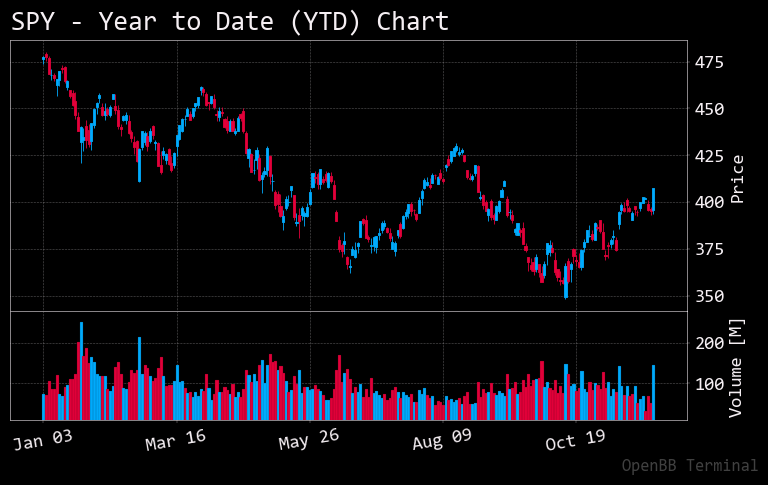

In [18]:
openbb.stocks.candle(
    data = spy_daily,
    asset_type = 'SPY - Year to Date (YTD) Chart',
    symbol = ''
)

### Load individual tickers without saving the data first

Loading Daily data for SPY with starting period 2019-11-27.

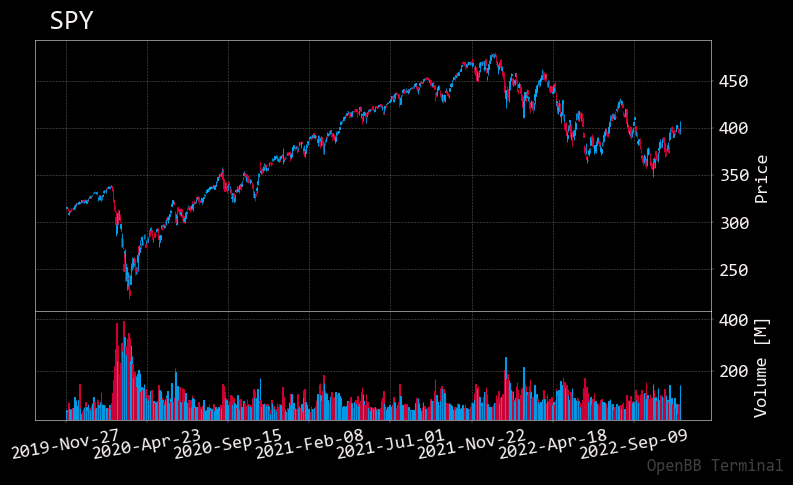

In [19]:
openbb.stocks.candle('SPY')

### Multi output functions and charts

> Where functions in the Terminal display **either a chart or raw data**, the command will have an additional `_chart` component.

#### Raw Data

In [20]:
openbb.ta.donchian(openbb.stocks.load('SPY', interval = 15))

Loading Intraday 15min data for SPY with starting period 2022-10-03.

,DCL_20_20,DCM_20_20,DCU_20_20
date,,,
2022-10-03 14:15:00,359.209991,363.409500,367.609009
2022-10-03 14:30:00,360.089996,364.027756,367.965515
2022-10-03 14:45:00,360.579987,364.564987,368.549988
2022-10-03 15:00:00,362.950012,365.750000,368.549988
2022-10-03 15:15:00,363.440002,365.994995,368.549988
...,...,...,...
2022-12-01 09:45:00,393.480011,401.600006,409.720001
2022-12-01 10:00:00,393.480011,401.740005,410.000000
2022-12-01 10:15:00,393.480011,401.740005,410.000000


#### Chart using `_chart`

Loading Intraday 15min data for SPY with starting period 2022-10-03.

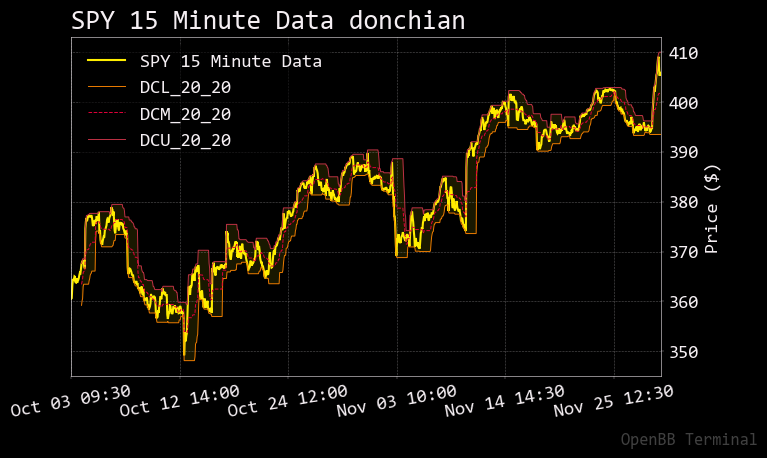

In [21]:
openbb.ta.donchian_chart(
    data = openbb.stocks.load('SPY', interval = 15),
    symbol = 'SPY 15 Minute Data'
)

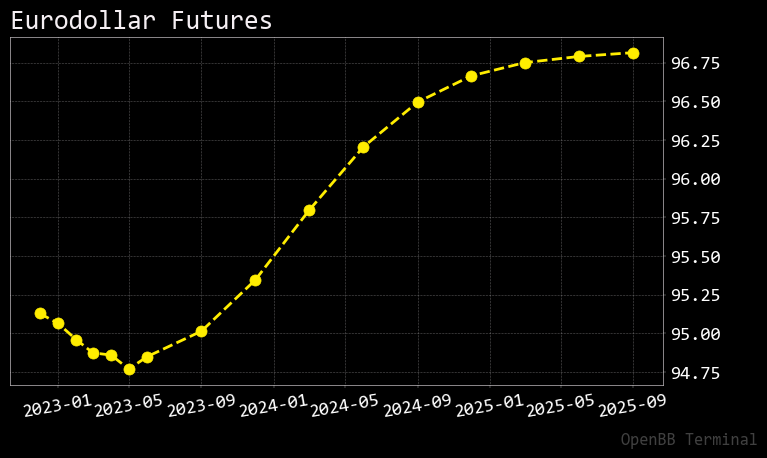

In [22]:
openbb.futures.curve_chart('GE')